# Figure 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from zebrafish_ms2_paper.trace_analysis import extract_traces, compute_trace_uncertainty, enforce_1spot_per_nucleus
import pandas as pd
import pickle

In [ ]:
"""specify the paths to the required datasets"""
path_to_dataset1 = "ADD_PATH_TO_DATASET1_HERE"
path_to_non_blank_timepoints = "ADD_PATH_TO_NON_BLANK_TIMEPOINTS_HERE"

In [8]:
"""plot style"""
rc('axes', linewidth=4)
fontweight = 'bold'
fontsize = 24
fontproperties = {'family':'sans-serif','sans-serif':['Arial'],'weight' : fontweight, 'size' : fontsize}

In [9]:
"""load the DataFrame with spot info and non_blank_timepoints array, which gives the correct time stamps"""
df = pd.read_pickle(path_to_non_blank_timepoints)

with open(path_to_non_blank_timepoints,'rb') as fp:
    non_blank_timepoints = pickle.load(fp)

## Figure 2E
Plot one example trace with error bars

In [10]:
"""extract just one trace"""
good_ids = [9161]
df = df[[nuc in good_ids for nuc in df.nucleus_id]]
df = enforce_1spot_per_nucleus(df, method='gauss3d_dog')

# extract culled traces
traces = extract_traces(df, method='gauss3d_dog')

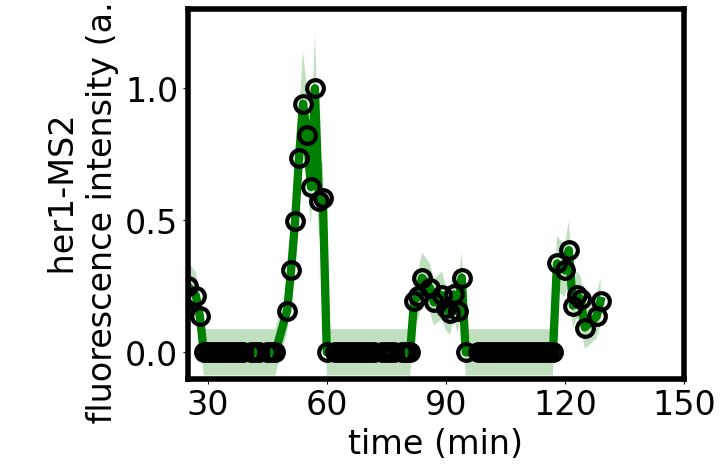

In [11]:
"""plot"""
plt.figure()
for i, trace in enumerate(traces):
    # unpack trace
    t_arr, inten_arr, nucleus = trace

    # assign correct time stamps
    t_arr = non_blank_timepoints[t_arr.astype('int')]

    # compute trace uncertainty
    sub_df = df[df.nucleus_id == nucleus]
    t_arr_bkg = sub_df.t.values
    bkg_arr = sub_df.offset.values
    t_arr_bkg = t_arr_bkg[~np.isnan(bkg_arr)]
    bkg_arr = bkg_arr[~np.isnan(bkg_arr)]
    s = compute_trace_uncertainty(t_arr_bkg, bkg_arr, inten_arr)
    l = inten_arr - s
    u = inten_arr + s

    # normalize trace to the maximum and plot
    max_inten = np.max(inten_arr)
    plt.plot(t_arr, inten_arr / max_inten, 'g-', linewidth=6, label='MS2')
    plt.plot(t_arr, inten_arr / max_inten, 'o', label='_nolabel_', markersize=12, fillstyle='none', markeredgecolor='k', markeredgewidth=3)
    plt.fill_between(t_arr, l / max_inten, u / max_inten, facecolor='g', alpha=0.25)

    # for clarity, only show a subset of the trace
    plt.xlim([25, 129])
    plt.ylim([-0.1, 1.3])
    plt.yticks([0, 0.5, 1])
    plt.xticks([30, 60, 90, 120, 150])
    plt.xlabel('time (min)', fontsize=fontsize)
    plt.ylabel('\n her1-MS2 \n fluorescence intensity (a.u.)', fontsize=fontsize)
    
    # adjust plot line thicknesses
    ax = plt.gca()
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)